# Tarea Agentes Contaminantes

# 1. Lectura de datos

## a. Leer el archivo CSV proporcionado y cargarlo en un DataFrame de pandas

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
# Define la ruta de la carpeta donde están los archivos CSV
# La ruta es una cadena de texto cruda (raw string) que permite incluir barras invertidas sin que se interpreten como caracteres de escape
carpeta = r'C:\Users\ferna\OneDrive\Escritorio\Diplomado IA\Modulo_3\Proyecto_2\rama_2023_05_missing_outliers_limited.csv'

In [79]:
# Lista para almacenar los DataFrames individuales
# Aquí se va a ir guardando cada DataFrame que se genere a partir de los archivos CSV
dataframes = []

In [80]:
df = pd.read_csv('rama_2023_05_missing_outliers_limited.csv')

### b. Mostrar las primeras filas del DataFrame para entender la estructura de los datos

In [81]:
df

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,NaN,21.170139,2.735683
3069,2023-05-28,0.286826,NaN,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [82]:
df.head(5)

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


# 2. Gráfico de las variables:

## a. Grafica las series de tiempo de cada variable para visualizar los datos a lo largo del tiempo

In [83]:
# Convertir la columna 'Fecha' al formato específico
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')

# Verificar si hay fechas que no se pudieron convertir
invalid_dates = df[df['fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)

In [91]:
df.set_index('fecha',inplace=True)

In [84]:
print(invalid_dates)

Empty DataFrame
Columns: [fecha, CO, NO, NO2, NOX, O3, PM10, PM25, SO2]
Index: []


In [85]:
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [86]:
df.isnull().sum()

fecha      0
CO       157
NO       155
NO2      157
NOX      142
O3       157
PM10     142
PM25     145
SO2      137
dtype: int64

<Axes: >

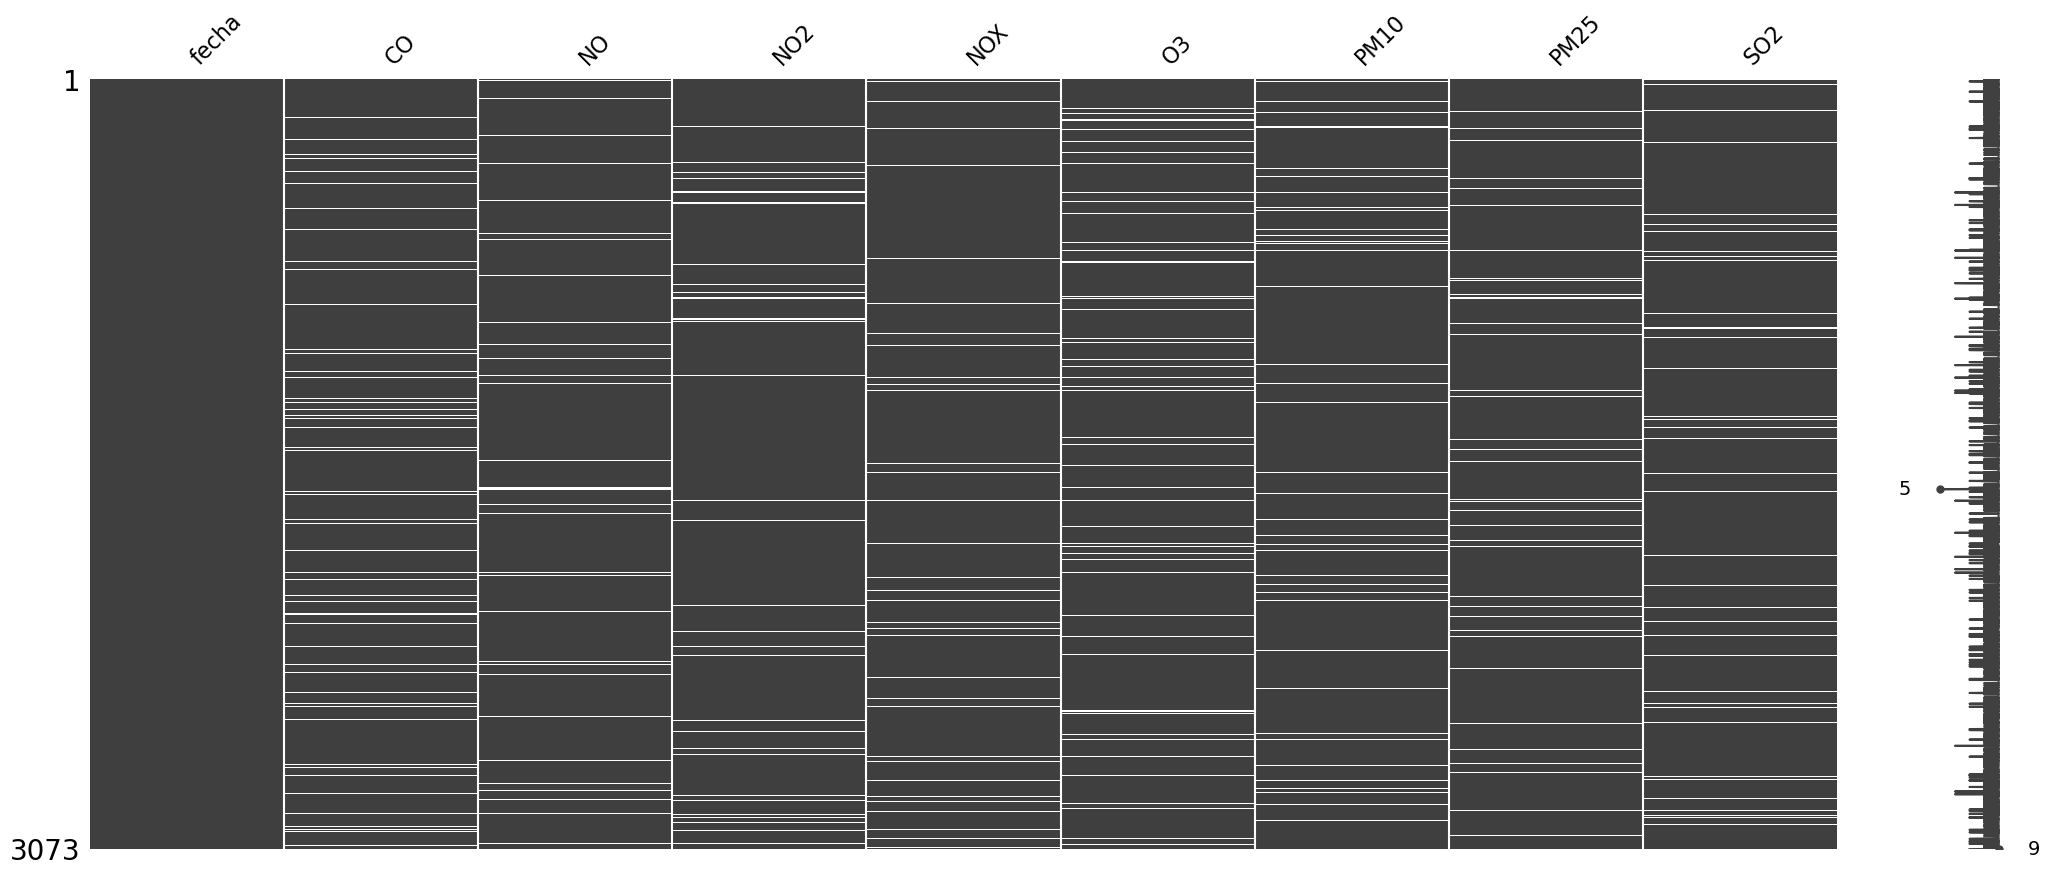

In [87]:
msno.matrix(df) # Visualización de los datos nulos

In [88]:
# Función para graficar series de tiempo con rango de fechas y zonas específicas
def plot_time_series(df, variable, ylabel, title, start_date=None, end_date=None):
    # Configurar el tamaño de la figura del gráfico
    plt.figure(figsize=(15, 5))
    
    # Si se proporcionan fechas de inicio y fin, filtrar el DataFrame para ese rango de fechas
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    

        # Crear el nombre de la columna combinando la zona y la variable
        column = f"{variable}"
        
        # Verificar si la columna existe en el DataFrame
        if column in df.columns:
            # Graficar la serie de tiempo de la columna
            plt.plot(df.index, df[column], label=column)
        else:
            # Imprimir un mensaje si la columna no se encuentra en el DataFrame
            print(f"Columna {column} no encontrada en el DataFrame")

    # Etiqueta del eje x
    plt.xlabel('Fecha_Hora')
    # Etiqueta del eje y
    plt.ylabel(ylabel)
    # Título del gráfico
    plt.title(title)
    # Mostrar la leyenda del gráfico
    plt.legend()
    # Mostrar el gráfico
    plt.show()

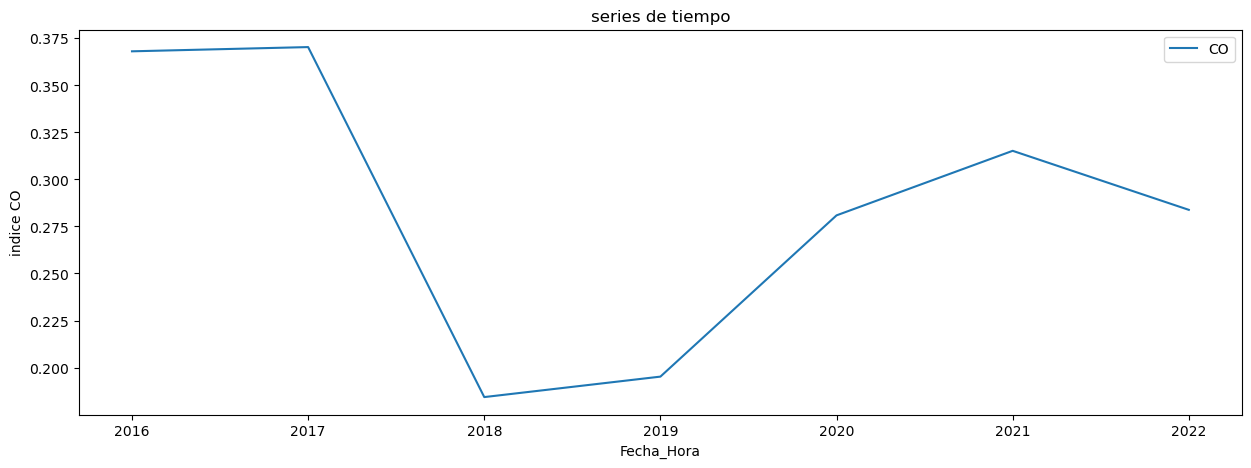

In [89]:
# Llamar a la función para graficar PM10 en las zonas específicas con el rango de fechas indicado
plot_time_series(df,'CO','indice CO','series de tiempo',start_date='2015-01-01',end_date='2022-12-31')

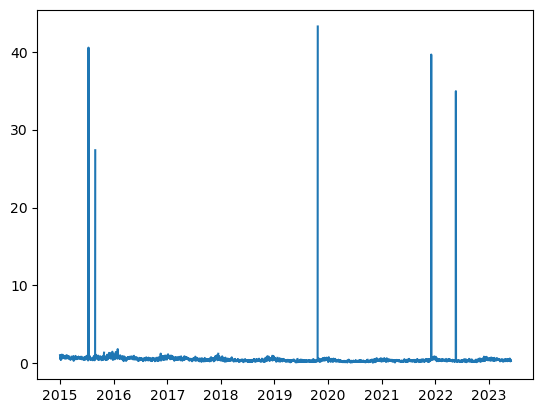

In [92]:
plt.plot(df.index, df['CO'])

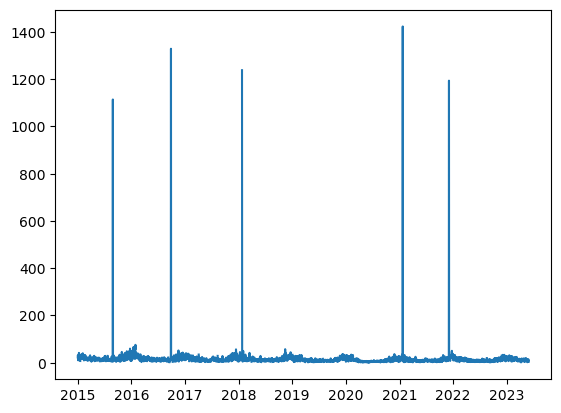

In [93]:
plt.plot(df.index, df['NO'])

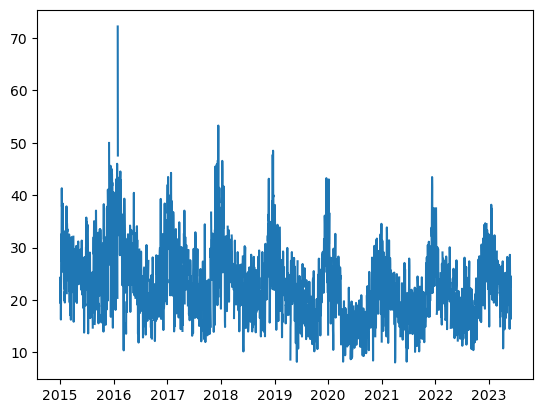

In [94]:
plt.plot(df.index, df['NO2'])

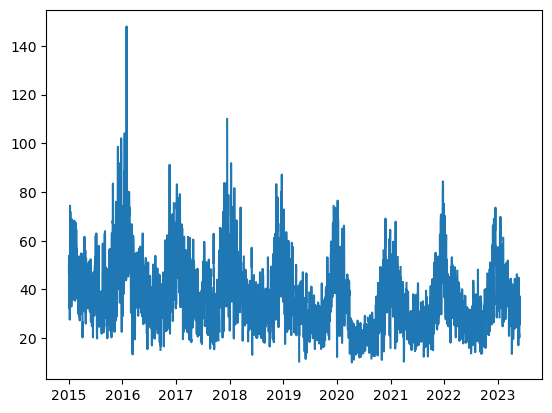

In [95]:
plt.plot(df.index, df['NOX'])

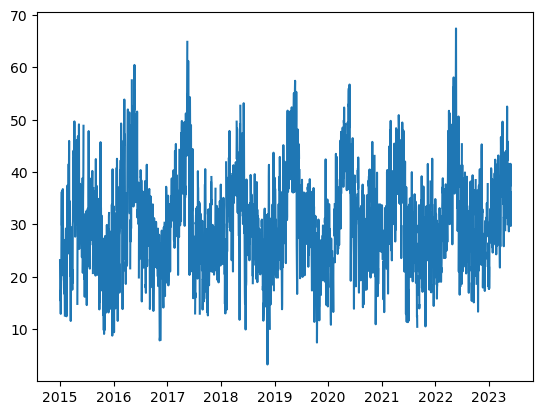

In [97]:
plt.plot(df.index, df['O3'])

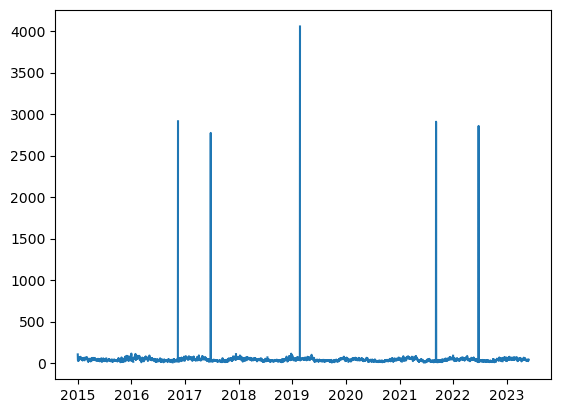

In [98]:
plt.plot(df.index, df['PM10'])

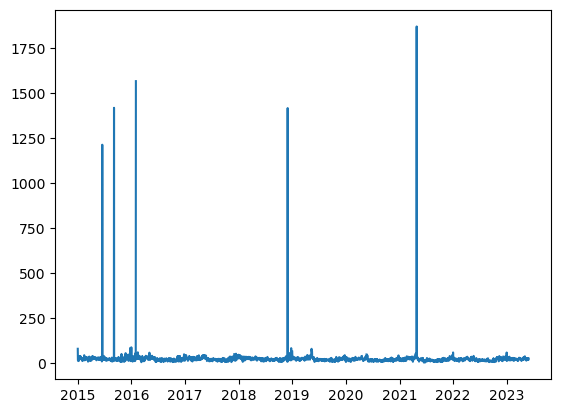

In [99]:
plt.plot(df.index, df['PM25'])

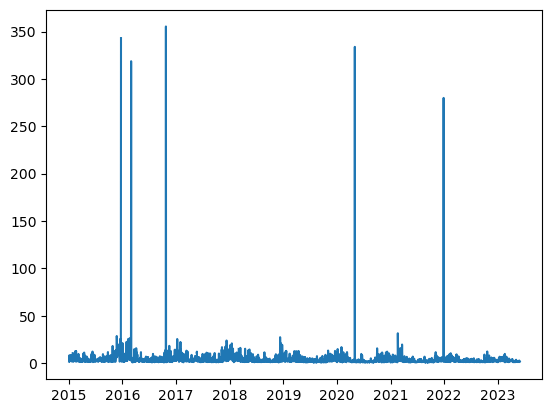

In [100]:
plt.plot(df.index, df['SO2'])

## b. Utiliza los gráficos para identificar visualmente los valores atípicos

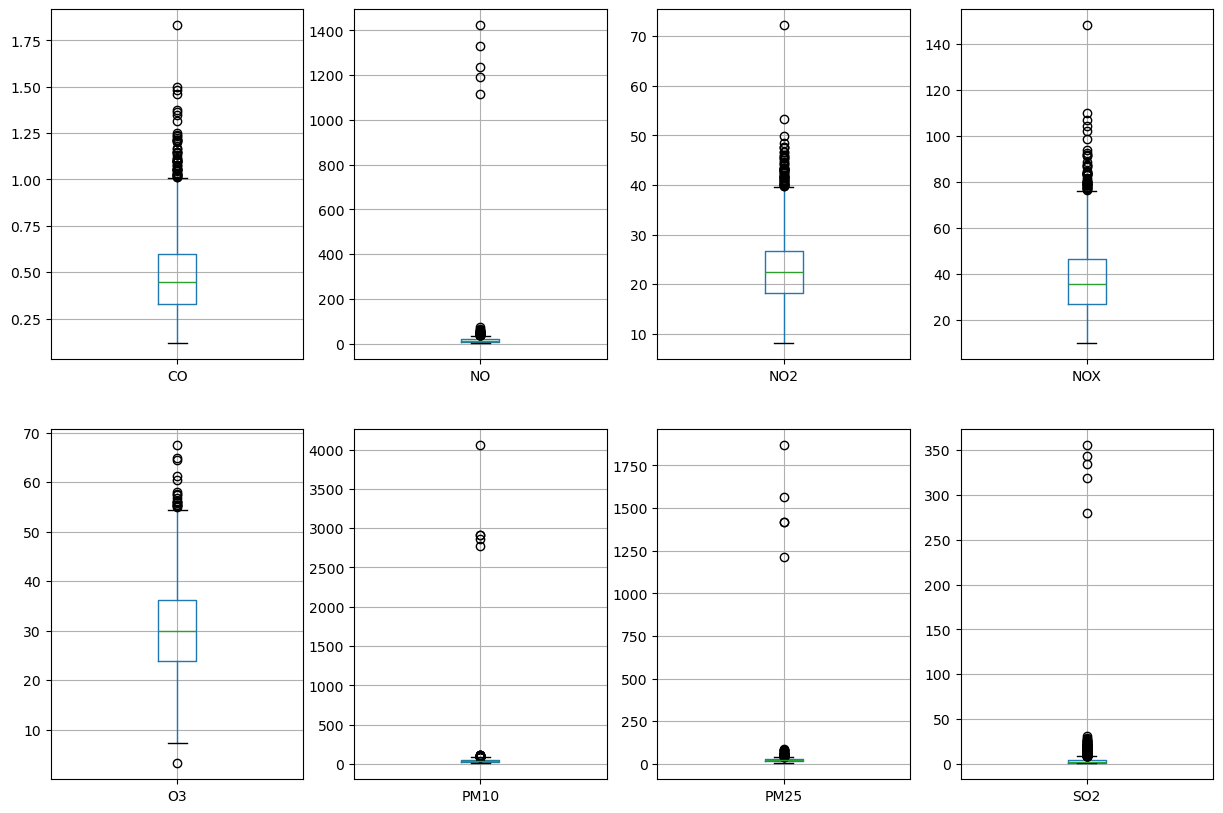

In [107]:
fig, axs = plt.subplots(2,4, figsize = (15,10))
df.boxplot(column = 'CO', ax= axs[0,0])
df.boxplot(column = 'NO', ax= axs[0,1])
df.boxplot(column = 'NO2', ax= axs[0,2])
df.boxplot(column = 'NOX', ax= axs[0,3])
df.boxplot(column = 'O3', ax= axs[1,0])
df.boxplot(column = 'PM10', ax= axs[1,1])
df.boxplot(column = 'PM25', ax= axs[1,2])
df.boxplot(column = 'SO2', ax= axs[1,3])

plt.show()



# 3. Identificación y manejo de valores atípicos


## a. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan

In [106]:
df.loc[df['CO']>20,'CO']= np.nan